Install Libaries

This code will not work within Google collab you have to run on jupyter notebook or other local host notebooks

---



In [ ]:
!pip install mediapipe opencv-python
!pip install joblib
!pip install scikit-learn


You should consider upgrading via the 'C:\Users\Danylo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Danylo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Danylo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


*Import* Libaries

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

Test the Model on camera


In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from joblib import load
import http.client, urllib.parse
import time

# Load the trained SVM model
model = load('C:/Users/Danylo/Downloads/Updated_SVM_Model.joblib')  # Modify the path to your model

# Initialise MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Define the indexes of landmarks to track
landmark_indexes = [0, 11, 12, 23, 24, 25, 26, 27, 28, 15, 16, 13, 14]

# Define connections between landmarks using the indices specified in 'landmark_indexes'
connections = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (1, 12), (12, 10), (2, 11), (11, 9)]

# Path to Camera
stream_url = 'http://000.000.0.00:0000/video'  # Replace with your IP address and port number
cap = cv2.VideoCapture(stream_url)

# Initialise fall detection variables
fall_detected = False
last_fall_time = time.time()

# Function to send a notification using Pushover
def send_pushover_notification(user_key, api_token, message):
    conn = http.client.HTTPSConnection("api.pushover.net:443")
    conn.request("POST", "/1/messages.json",
                 urllib.parse.urlencode({
                     "token": api_token,
                     "user": user_key,
                     "message": message,
                 }), {"Content-type": "application/x-www-form-urlencoded"})
    response = conn.getresponse()
    if response.status == 200:
        print("Notification sent successfully!")
    else:
        print(f"Failed to send notification: {response.reason}")
    conn.close()

# Input Pushover User and API key below
user_key = ""
api_token = ""

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video file reached.")
        break  # Exit the loop if the video ends

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame.flags.writeable = False
    results = pose.process(frame)
    frame.flags.writeable = True
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    if results.pose_landmarks:
        # Extracting selected pose landmarks based on specified indexes
        selected_pose_landmarks = [results.pose_landmarks.landmark[i] for i in landmark_indexes]
        # Extracting x, y coordinates of pose landmarks
        pose_landmarks = [[lmk.x, lmk.y] for lmk in selected_pose_landmarks]
        # Flattening the 2D array of pose landmarks into a 1D array
        pose_landmarks_flat = np.array(pose_landmarks).flatten().reshape(1, -1)
        # Predicting using the trained mode
        prediction = model.predict(pose_landmarks_flat)

        if prediction[0] == 1:  # '1' is the label for 'Fall'
            skeleton_color = (0, 255, 0)  # Skeleton color is green when in a No Fall state
            text = 'No Fall'
        else:
            skeleton_color = (0, 0, 255)  # Skeleton color changes to red when in Fall state
            text = 'Fall'
            current_time = time.time()
            if not fall_detected or current_time - last_fall_time > 60:
                # The code waits a minute if the person is still in a fall state after a minute,
                # the notification is sent again.
                send_pushover_notification(user_key, api_token, "Fall detected! Immediate attention required.")
                fall_detected = True
                last_fall_time = current_time

        cv2.putText(frame, text, (frame.shape[1] - 150, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, skeleton_color, 2,
                    cv2.LINE_AA)
        # Draw landmarks on the frame
        for landmark in selected_pose_landmarks:
            x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
            cv2.circle(frame, (x, y), 5, skeleton_color, -1)
        # Draw connections between landmarks
        for connection in connections:
            start_idx, end_idx = connection
            start_landmark = selected_pose_landmarks[start_idx]
            end_landmark = selected_pose_landmarks[end_idx]
            start_x, start_y = int(start_landmark.x * frame.shape[1]), int(start_landmark.y * frame.shape[0])
            end_x, end_y = int(end_landmark.x * frame.shape[1]), int(end_landmark.y * frame.shape[0])
            cv2.line(frame, (start_x, start_y), (end_x, end_y), skeleton_color, 2)

    cv2.imshow('Fall Detection', frame)
    if cv2.waitKey(5) & 0xFF == 27:  # Check for the 'Esc' key
        break

cap.release()  # Release the video capture object
cv2.destroyAllWindows()  # Close all OpenCV windows


C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Notification sent successfully!


C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Notification sent successfully!


C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Danylo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Pushover notification proof

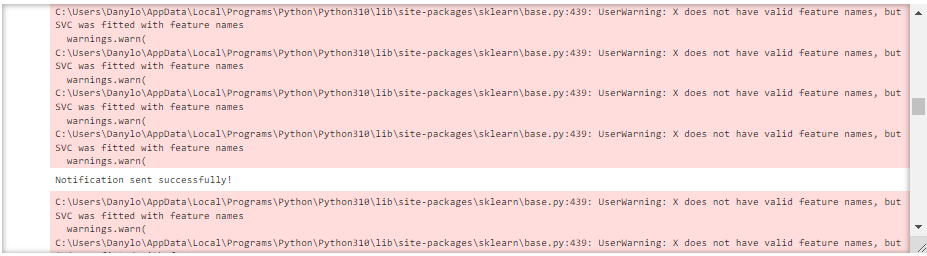